# 0319-0417 chatbot 聊天記錄分析
## 分成三個動作，從顧客移除自選股、新增自選股、以及查詢的狀況來討論。

In [1]:
import pandas as pd
df = pd.read_csv("/Users/lai/Desktop/test2.csv")

In [2]:
df

,timestamp,event,message,type,user_id,排序
0,2020-04-06 00:46:04,message,-00708L,info,544,2749
1,2020-04-06 00:45:58,message,-00743,info,544,2748
2,2020-04-07 08:29:02,message,-00762,info,640,3279
3,2020-03-30 10:19:31,message,-00762,info,102,702
4,2020-04-12 08:37:45,message,-1101,info,386,2107
...,...,...,...,...,...,...
3660,2020-03-19 02:17:55,message,TSMC,info,16,159
3661,2020-03-27 09:24:41,message,VIX,info,369,2032
3662,2020-03-20 12:43:34,message,YANG,info,125,873
3663,2020-03-20 12:43:40,message,YINN,info,125,874


In [3]:
df1=df.head(362)
df1

,timestamp,event,message,type,user_id,排序
0,2020-04-06 00:46:04,message,-00708L,info,544,2749
1,2020-04-06 00:45:58,message,-00743,info,544,2748
2,2020-04-07 08:29:02,message,-00762,info,640,3279
3,2020-03-30 10:19:31,message,-00762,info,102,702
4,2020-04-12 08:37:45,message,-1101,info,386,2107
...,...,...,...,...,...,...
357,2020-04-10 04:12:33,message,-9941,info,770,3830
358,2020-03-27 16:13:12,message,-9945,info,386,2090
359,2020-04-12 08:38:01,message,-9946,info,386,2109
360,2020-03-25 06:31:42,message,-9951,info,289,1683


In [4]:
table=pd.DataFrame(df1)
csv_pd=table.to_csv('remove.csv')

# 第一部分

## 移除自選股、清理資料

In [5]:
dfaa = pd.read_csv("/Users/lai/Desktop/remove.csv")
dfaa

,Unnamed: 0,timestamp,event,message,type,user_id,排序
0,19,2020-03-19 09:59:56,message,-1536,info,4,28
1,21,2020-03-19 10:00:36,message,-1565,info,4,32
2,35,2020-03-24 22:10:02,message,"-1762,1789,4142",info,6,39
3,61,2020-04-10 04:25:37,message,"-2313,3217,3653,6278",info,6,45
4,95,2020-04-15 07:46:42,message,-2368,info,6,54
...,...,...,...,...,...,...,...
357,240,2020-04-15 03:18:11,message,"-5216,5244,5248,5277,6455,6489,6559,6729,8179",info,842,4053
358,267,2020-04-15 03:19:33,message,-6164,info,842,4055
359,275,2020-04-15 02:49:28,message,-6192,info,842,4045
360,57,2020-04-17 09:01:14,message,-2303,info,874,4145


In [115]:
user_id=[]
for i in dfaa['user_id']:
    user_id.append(i)

In [37]:
import re

In [70]:
message = []
for i in dfaa['message']:
    
    message.append(re.split(',|，|；|-',i))
    

In [71]:
message

[['', '1536'],
 ['', '1565'],
 ['', '1762', '1789', '4142'],
 ['', '2313', '3217', '3653', '6278'],
 ['', '2368'],
 ['', '2408', '1904', '3481', '6416'],
 ['', '3017', '8086'],
 ['', '3105', '3661', '3406'],
 ['', '3546'],
 ['', '4935', '3338'],
 ['', '5215'],
 ['', '6669'],
 ['', '2330'],
 ['', '4712'],
 ['', '6743'],
 ['', '2330'],
 ['', '5349'],
 ['', '5867'],
 ['', '5876'],
 ['', '8213'],
 ['', '6292'],
 ['', '1101'],
 ['', '1102'],
 ['', '1604'],
 ['', '1605'],
 ['', '2383'],
 ['', '2402'],
 ['', '2897'],
 ['', '3003'],
 ['', '3017'],
 ['', '3042'],
 ['', '3052'],
 ['', '6153'],
 ['', '6153'],
 ['', '6213'],
 ['', '9939'],
 ['', '2223'],
 ['', '2233'],
 ['', '2897'],
 ['', '8213'],
 ['', '2368'],
 ['', '2492'],
 ['', '6168'],
 ['', '6290'],
 ['', '2458'],
 ['', '4126'],
 ['', '6190'],
 ['', '1730'],
 ['', '2206'],
 ['', '2330'],
 ['', '2327'],
 ['', '3376'],
 ['', '3548'],
 ['', '4935'],
 ['', '4968'],
 ['', '6238'],
 ['', '6271'],
 ['', '6451', '', '3548'],
 ['', '6531', '', '645

In [80]:
# for i in message:
#     del i[0]
for i in message:
    if '' in i:
        i.remove('')

In [81]:
message

[['1536'],
 ['1565'],
 ['1762', '1789', '4142'],
 ['2313', '3217', '3653', '6278'],
 ['2368'],
 ['2408', '1904', '3481', '6416'],
 ['3017', '8086'],
 ['3105', '3661', '3406'],
 ['3546'],
 ['4935', '3338'],
 ['5215'],
 ['6669'],
 ['2330'],
 ['4712'],
 ['6743'],
 ['2330'],
 ['5349'],
 ['5867'],
 ['5876'],
 ['8213'],
 ['6292'],
 ['1101'],
 ['1102'],
 ['1604'],
 ['1605'],
 ['2383'],
 ['2402'],
 ['2897'],
 ['3003'],
 ['3017'],
 ['3042'],
 ['3052'],
 ['6153'],
 ['6153'],
 ['6213'],
 ['9939'],
 ['2223'],
 ['2233'],
 ['2897'],
 ['8213'],
 ['2368'],
 ['2492'],
 ['6168'],
 ['6290'],
 ['2458'],
 ['4126'],
 ['6190'],
 ['1730'],
 ['2206'],
 ['2330'],
 ['2327'],
 ['3376'],
 ['3548'],
 ['4935'],
 ['4968'],
 ['6238'],
 ['6271'],
 ['6451', '3548'],
 ['6531', '6451', '', '3548'],
 ['6679'],
 ['8086'],
 ['2062'],
 ['2206'],
 ['2208'],
 ['2345'],
 ['2387'],
 ['2453'],
 ['2458'],
 ['2732'],
 ['3217'],
 ['3406'],
 ['4566'],
 ['5356'],
 ['6125'],
 ['6596'],
 ['8404'],
 ['8431'],
 ['9935'],
 ['9938'],
 ['9927

In [86]:
len(user_id) == len(message)

True

In [83]:
item_dict={}
for i in message:
    for x in i:
        if item_dict.get(x) == None:
            item_dict[x] = {}

In [84]:
item_dict

{'1536': {},
 '1565': {},
 '1762': {},
 '1789': {},
 '4142': {},
 '2313': {},
 '3217': {},
 '3653': {},
 '6278': {},
 '2368': {},
 '2408': {},
 '1904': {},
 '3481': {},
 '6416': {},
 '3017': {},
 '8086': {},
 '3105': {},
 '3661': {},
 '3406': {},
 '3546': {},
 '4935': {},
 '3338': {},
 '5215': {},
 '6669': {},
 '2330': {},
 '4712': {},
 '6743': {},
 '5349': {},
 '5867': {},
 '5876': {},
 '8213': {},
 '6292': {},
 '1101': {},
 '1102': {},
 '1604': {},
 '1605': {},
 '2383': {},
 '2402': {},
 '2897': {},
 '3003': {},
 '3042': {},
 '3052': {},
 '6153': {},
 '6213': {},
 '9939': {},
 '2223': {},
 '2233': {},
 '2492': {},
 '6168': {},
 '6290': {},
 '2458': {},
 '4126': {},
 '6190': {},
 '1730': {},
 '2206': {},
 '2327': {},
 '3376': {},
 '3548': {},
 '4968': {},
 '6238': {},
 '6271': {},
 '6451': {},
 '6531': {},
 '': {},
 '6679': {},
 '2062': {},
 '2208': {},
 '2345': {},
 '2387': {},
 '2453': {},
 '2732': {},
 '4566': {},
 '5356': {},
 '6125': {},
 '6596': {},
 '8404': {},
 '8431': {},
 '9

In [109]:
for item2 in item_dict: #每一個字詞
    item_dict[item2]={}
    user = 0
    for item1 in message:#每一個紀錄的股票代碼
        for term in item1:
            num=0
            if term == item2:
                num+=1
            if item_dict[item2].get(user_id[user]) == None:
                item_dict[item2][user_id[user]] = num 
            else:
                item_dict[item2][user_id[user]]+=num
        user+=1

In [ ]:
user

In [128]:

user={}
for i in range(len(user_id)):
    
    if user.get(user_id[i]) == None:
        user[user_id[i]]=[]
        for item in message[i]:
            user[user_id[i]].append(item)
    else:
        for item in message[i]:
            user[user_id[i]].append(item)
    
    

In [129]:
user

{4: ['1536', '1565'],
 6: ['1762',
  '1789',
  '4142',
  '2313',
  '3217',
  '3653',
  '6278',
  '2368',
  '2408',
  '1904',
  '3481',
  '6416',
  '3017',
  '8086',
  '3105',
  '3661',
  '3406',
  '3546',
  '4935',
  '3338',
  '5215',
  '6669'],
 9: ['2330'],
 11: ['4712'],
 14: ['6743'],
 17: ['2330', '5349', '5867', '5876'],
 25: ['8213'],
 27: ['6292'],
 31: ['1101',
  '1102',
  '1604',
  '1605',
  '2383',
  '2402',
  '2897',
  '3003',
  '3017',
  '3042',
  '3052',
  '6153',
  '6153',
  '6213',
  '9939'],
 34: ['2223', '2233'],
 39: ['2897', '8213'],
 40: ['2368', '2492', '6168', '6290'],
 45: ['2458', '4126', '6190'],
 47: ['1730'],
 62: ['2206', '2330'],
 66: ['2327',
  '3376',
  '3548',
  '4935',
  '4968',
  '6238',
  '6271',
  '6451',
  '3548',
  '6531',
  '6451',
  '',
  '3548',
  '6679',
  '8086'],
 77: ['2062',
  '2206',
  '2208',
  '2345',
  '2387',
  '2453',
  '2458',
  '2732',
  '3217',
  '3406',
  '4566',
  '5356',
  '6125',
  '6596',
  '8404',
  '8431',
  '9935',
  '9938

In [131]:
linestock=[]
for i in user:
    linestock.append(user[i])

In [132]:
linestock

[['1536', '1565'],
 ['1762',
  '1789',
  '4142',
  '2313',
  '3217',
  '3653',
  '6278',
  '2368',
  '2408',
  '1904',
  '3481',
  '6416',
  '3017',
  '8086',
  '3105',
  '3661',
  '3406',
  '3546',
  '4935',
  '3338',
  '5215',
  '6669'],
 ['2330'],
 ['4712'],
 ['6743'],
 ['2330', '5349', '5867', '5876'],
 ['8213'],
 ['6292'],
 ['1101',
  '1102',
  '1604',
  '1605',
  '2383',
  '2402',
  '2897',
  '3003',
  '3017',
  '3042',
  '3052',
  '6153',
  '6153',
  '6213',
  '9939'],
 ['2223', '2233'],
 ['2897', '8213'],
 ['2368', '2492', '6168', '6290'],
 ['2458', '4126', '6190'],
 ['1730'],
 ['2206', '2330'],
 ['2327',
  '3376',
  '3548',
  '4935',
  '4968',
  '6238',
  '6271',
  '6451',
  '3548',
  '6531',
  '6451',
  '',
  '3548',
  '6679',
  '8086'],
 ['2062',
  '2206',
  '2208',
  '2345',
  '2387',
  '2453',
  '2458',
  '2732',
  '3217',
  '3406',
  '4566',
  '5356',
  '6125',
  '6596',
  '8404',
  '8431',
  '9935',
  '9938'],
 ['9927'],
 ['2882', '3388', '4987'],
 ['2308'],
 ['3035', '3

In [138]:
u=[]
from collections import Counter
for i in Counter(user_id):
    u.append(i)

In [139]:
len(u)

117

In [133]:
len(linestock)

117

In [107]:
message

[['1536'],
 ['1565'],
 ['1762', '1789', '4142'],
 ['2313', '3217', '3653', '6278'],
 ['2368'],
 ['2408', '1904', '3481', '6416'],
 ['3017', '8086'],
 ['3105', '3661', '3406'],
 ['3546'],
 ['4935', '3338'],
 ['5215'],
 ['6669'],
 ['2330'],
 ['4712'],
 ['6743'],
 ['2330'],
 ['5349'],
 ['5867'],
 ['5876'],
 ['8213'],
 ['6292'],
 ['1101'],
 ['1102'],
 ['1604'],
 ['1605'],
 ['2383'],
 ['2402'],
 ['2897'],
 ['3003'],
 ['3017'],
 ['3042'],
 ['3052'],
 ['6153'],
 ['6153'],
 ['6213'],
 ['9939'],
 ['2223'],
 ['2233'],
 ['2897'],
 ['8213'],
 ['2368'],
 ['2492'],
 ['6168'],
 ['6290'],
 ['2458'],
 ['4126'],
 ['6190'],
 ['1730'],
 ['2206'],
 ['2330'],
 ['2327'],
 ['3376'],
 ['3548'],
 ['4935'],
 ['4968'],
 ['6238'],
 ['6271'],
 ['6451', '3548'],
 ['6531', '6451', '', '3548'],
 ['6679'],
 ['8086'],
 ['2062'],
 ['2206'],
 ['2208'],
 ['2345'],
 ['2387'],
 ['2453'],
 ['2458'],
 ['2732'],
 ['3217'],
 ['3406'],
 ['4566'],
 ['5356'],
 ['6125'],
 ['6596'],
 ['8404'],
 ['8431'],
 ['9935'],
 ['9938'],
 ['9927

In [111]:
item_dict

{'1536': {4: 1,
  6: 0,
  9: 0,
  11: 0,
  14: 0,
  17: 0,
  25: 0,
  27: 0,
  31: 0,
  34: 0,
  39: 0,
  40: 0,
  45: 0,
  47: 0,
  62: 0,
  66: 0,
  77: 0,
  83: 0,
  91: 0,
  94: 0,
  99: 0,
  100: 0,
  102: 0,
  112: 0,
  116: 0,
  119: 0,
  121: 0,
  126: 0,
  131: 0,
  135: 0,
  196: 0,
  205: 0,
  208: 0,
  210: 0,
  211: 0,
  213: 0,
  216: 0,
  217: 0,
  222: 0,
  223: 0,
  227: 0,
  238: 0,
  241: 0,
  243: 0,
  244: 0,
  246: 0,
  253: 0,
  258: 0,
  262: 0,
  267: 0,
  289: 0,
  295: 0,
  309: 0,
  329: 0,
  337: 0,
  340: 0,
  353: 0,
  364: 0,
  386: 0,
  403: 0,
  423: 0,
  429: 0,
  434: 0,
  443: 0,
  451: 0,
  453: 0,
  488: 0,
  493: 0,
  494: 0,
  519: 0,
  522: 0,
  531: 0,
  544: 0,
  549: 0,
  552: 0,
  553: 0,
  554: 0,
  556: 0,
  561: 0,
  563: 0,
  567: 0,
  570: 0,
  573: 0,
  578: 0,
  586: 0,
  594: 0,
  600: 0,
  628: 0,
  634: 0,
  635: 0,
  640: 0,
  644: 0,
  648: 0,
  652: 0,
  655: 0,
  666: 0,
  673: 0,
  683: 0,
  689: 0,
  692: 0,
  700: 0,
  702:

# 離散矩正

In [112]:
TDM = pd.DataFrame.from_dict(item_dict)
TDM.head()

,1536,1565,1762,1789,4142,2313,3217,3653,6278,2368,...,5244,5248,5277,6455,6489,6559,6729,8179,6192,2303
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Co-Occurrence Matrix

In [144]:
item_dict

{'1536': {},
 '1565': {},
 '1762': {},
 '1789': {},
 '4142': {},
 '2313': {},
 '3217': {},
 '3653': {},
 '6278': {},
 '2368': {},
 '2408': {},
 '1904': {},
 '3481': {},
 '6416': {},
 '3017': {},
 '8086': {},
 '3105': {},
 '3661': {},
 '3406': {},
 '3546': {},
 '4935': {},
 '3338': {},
 '5215': {},
 '6669': {},
 '2330': {},
 '4712': {},
 '6743': {},
 '5349': {},
 '5867': {},
 '5876': {},
 '8213': {},
 '6292': {},
 '1101': {},
 '1102': {},
 '1604': {},
 '1605': {},
 '2383': {},
 '2402': {},
 '2897': {},
 '3003': {},
 '3042': {},
 '3052': {},
 '6153': {},
 '6213': {},
 '9939': {},
 '2223': {},
 '2233': {},
 '2492': {},
 '6168': {},
 '6290': {},
 '2458': {},
 '4126': {},
 '6190': {},
 '1730': {},
 '2206': {},
 '2327': {},
 '3376': {},
 '3548': {},
 '4968': {},
 '6238': {},
 '6271': {},
 '6451': {},
 '6531': {},
 '': {},
 '6679': {},
 '2062': {},
 '2208': {},
 '2345': {},
 '2387': {},
 '2453': {},
 '2732': {},
 '4566': {},
 '5356': {},
 '6125': {},
 '6596': {},
 '8404': {},
 '8431': {},
 '9

In [145]:
item_dict={}
for i in message:
    for x in i:
        if item_dict.get(x) == None:
            item_dict[x] = {}

for line in linestock:                  
    for name1 in line:                  
        for name2 in line:             
            if name1 == name2:
                continue
            if item_dict[name1].get(name2) is None:     
                item_dict[name1][name2]= 1
            else:
                item_dict[name1][name2] = item_dict[name1][name2]+ 1       


In [146]:
item_dict

{'1536': {'1565': 1},
 '1565': {'1536': 1, '1227': 1, '1817': 1},
 '1762': {'1789': 1,
  '4142': 1,
  '2313': 1,
  '3217': 1,
  '3653': 1,
  '6278': 1,
  '2368': 1,
  '2408': 1,
  '1904': 1,
  '3481': 1,
  '6416': 1,
  '3017': 1,
  '8086': 1,
  '3105': 1,
  '3661': 1,
  '3406': 1,
  '3546': 1,
  '4935': 1,
  '3338': 1,
  '5215': 1,
  '6669': 1},
 '1789': {'1762': 1,
  '4142': 1,
  '2313': 1,
  '3217': 1,
  '3653': 1,
  '6278': 1,
  '2368': 1,
  '2408': 1,
  '1904': 1,
  '3481': 1,
  '6416': 1,
  '3017': 1,
  '8086': 1,
  '3105': 1,
  '3661': 1,
  '3406': 1,
  '3546': 1,
  '4935': 1,
  '3338': 1,
  '5215': 1,
  '6669': 1},
 '4142': {'1762': 1,
  '1789': 1,
  '2313': 1,
  '3217': 1,
  '3653': 1,
  '6278': 1,
  '2368': 1,
  '2408': 1,
  '1904': 1,
  '3481': 1,
  '6416': 1,
  '3017': 1,
  '8086': 1,
  '3105': 1,
  '3661': 1,
  '3406': 1,
  '3546': 1,
  '4935': 1,
  '3338': 1,
  '5215': 1,
  '6669': 1},
 '2313': {'1762': 1,
  '1789': 1,
  '4142': 1,
  '3217': 1,
  '3653': 2,
  '6278': 1,
  

In [149]:
co_occur_by_records=[]
for name,edges in item_dict.items():
    for v,w in edges.items():
        if w > 2:
            co_occur_by_records.append([name, v, w]) 

In [150]:
co_occur_by_records

[['2313', '3481', 3],
 ['3653', '3481', 3],
 ['2368', '3481', 3],
 ['3481', '2313', 3],
 ['3481', '3653', 3],
 ['3481', '2368', 3],
 ['3481', '3017', 3],
 ['3481', '4935', 3],
 ['3481', '3338', 3],
 ['3481', '6147', 3],
 ['3481', '8358', 3],
 ['3481', '2499', 4],
 ['3481', '3673', 4],
 ['3481', '6164', 4],
 ['3481', '5349', 4],
 ['3017', '3481', 3],
 ['3017', '6153', 3],
 ['8086', '3548', 3],
 ['4935', '3481', 3],
 ['4935', '3548', 3],
 ['3338', '3481', 3],
 ['5349', '2499', 4],
 ['5349', '3673', 4],
 ['5349', '6164', 4],
 ['5349', '3481', 4],
 ['2383', '6153', 3],
 ['2402', '6153', 3],
 ['6153', '2383', 3],
 ['6153', '2402', 3],
 ['6153', '3017', 3],
 ['6153', '6213', 3],
 ['6213', '6153', 3],
 ['6213', '6488', 6],
 ['2327', '3548', 3],
 ['3376', '3548', 3],
 ['3548', '2327', 3],
 ['3548', '3376', 3],
 ['3548', '4935', 3],
 ['3548', '4968', 3],
 ['3548', '6238', 3],
 ['3548', '6271', 3],
 ['3548', '6451', 6],
 ['3548', '6531', 3],
 ['3548', '', 3],
 ['3548', '6679', 3],
 ['3548', '808

In [151]:
np.random.shuffle(co_occur_by_records)
temp_matrix = pd.DataFrame()
for i in co_occur_by_records:
    temp_matrix.at[i[0], i[1]] = i[2]
co_occurrence_matrix_by_records = pd.DataFrame()
for i in temp_matrix:
    for j in temp_matrix:
        co_occurrence_matrix_by_records.at[i, j] = temp_matrix.at[i, j]
co_occurrence_matrix_by_records.head()

,6153,3548,3653,,3673,6213,6271,3481,6679,8086,...,3338,6488,2368,5349,8358,2383,6147,4968,2402,6238
6153,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,3.0,NaN
3548,NaN,NaN,NaN,3.0,NaN,NaN,3.0,NaN,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,3.0
3653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN


# 共線圖

/Users/lai/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/Users/lai/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/lai/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


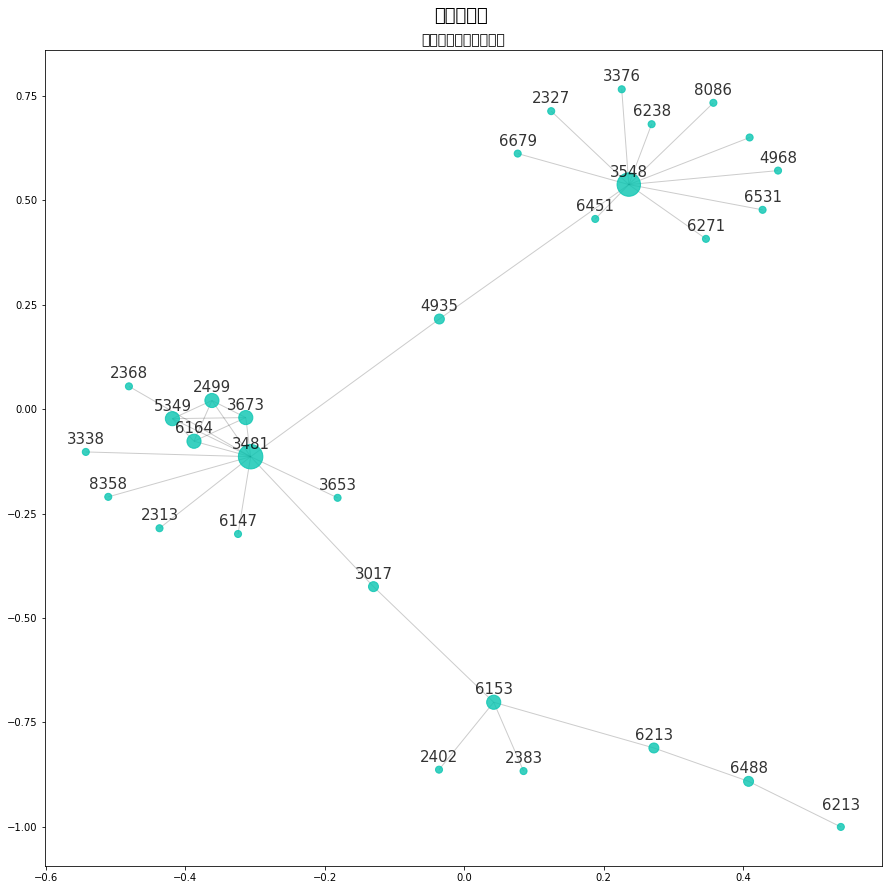

In [154]:
plt.figure(figsize=(15,15))
plt.rcParams['font.sans-serif'] = ['SimHei']   
plt.rcParams['font.family']='sans-serif'
g = nx.Graph()
g.add_weighted_edges_from(co_occur_by_records)
pos=nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, alpha=0.8,node_size=[val*50 for (node, val) in g.degree()], node_color='#08c5b1')
nx.draw_networkx_edges(g, pos, node_color='b', alpha=0.2)
for p in pos:  # raise text positions
    pos[p][1] = pos[p][1] + 0.03
nx.draw_networkx_labels(g, pos, font_size = 15, font_family='sans-serif', alpha=0.8)
#plt.savefig("用詞共線圖_以每筆通聯紀錄為一句.png", dpi=100)
plt.show()

可以發現當顧客移除3481跟3548附加也會一起移除的股票，那就可以得知這些股票是相關聯的那推播時也能一併的推播

# 熱度圖

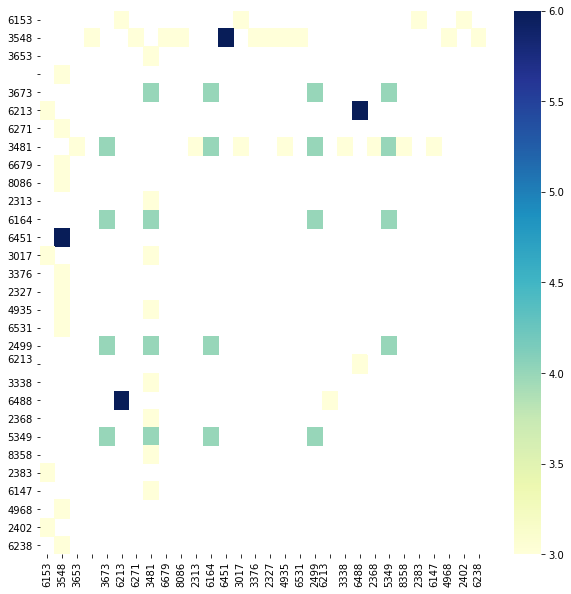

In [157]:
import seaborn as sn
plt.figure(figsize=(10,10))
sn.heatmap(co_occurrence_matrix_by_records,cmap='YlGnBu')

#plt.savefig("images/用詞熱度圖_以每筆通聯紀錄為一句.png", dpi=100)
plt.show()

# 第二部分

# 新增 動作

In [176]:
df2=df[395:1456]
table=pd.DataFrame(df2)
csv_pd=table.to_csv('remove1.csv')

In [177]:
dfbb = pd.read_csv("remove1.csv")
dfbb

,Unnamed: 0,timestamp,event,message,type,user_id,排序
0,395,2020-04-14 08:45:18,message,+ 信紘科,info,317,1881
1,396,2020-04-07 08:18:15,message,+0050,info,637,3270
2,397,2020-03-29 23:24:03,message,+0050,info,418,2229
3,398,2020-04-10 01:13:59,message,+0050,info,194,1169
4,399,2020-04-07 08:18:01,message,+0056,info,637,3269
...,...,...,...,...,...,...,...
1056,1451,2020-03-19 09:20:30,message,+鴻海,info,45,389
1057,1452,2020-04-16 04:53:40,message,+燿華,info,681,3473
1058,1453,2020-03-25 11:25:14,message,+BRKB,info,310,1834
1059,1454,2020-03-20 14:08:00,message,+M31,info,99,642


In [179]:
user_id=[]
for i in dfbb['user_id']:
    user_id.append(i)
user_id

[317,
 637,
 418,
 194,
 637,
 223,
 295,
 295,
 248,
 248,
 101,
 31,
 103,
 103,
 386,
 31,
 119,
 119,
 119,
 119,
 63,
 666,
 477,
 851,
 47,
 63,
 689,
 453,
 189,
 770,
 681,
 101,
 100,
 101,
 100,
 29,
 668,
 577,
 101,
 364,
 101,
 751,
 695,
 689,
 222,
 290,
 244,
 101,
 101,
 624,
 578,
 262,
 101,
 31,
 31,
 222,
 222,
 31,
 31,
 116,
 535,
 210,
 411,
 119,
 719,
 453,
 241,
 119,
 63,
 648,
 101,
 96,
 101,
 719,
 17,
 292,
 34,
 488,
 586,
 211,
 544,
 101,
 194,
 63,
 488,
 244,
 488,
 544,
 210,
 488,
 761,
 578,
 553,
 553,
 295,
 292,
 101,
 30,
 467,
 119,
 577,
 553,
 437,
 334,
 241,
 165,
 210,
 338,
 42,
 111,
 108,
 94,
 697,
 689,
 289,
 99,
 15,
 719,
 396,
 94,
 842,
 692,
 661,
 545,
 531,
 493,
 434,
 434,
 274,
 222,
 6,
 225,
 798,
 798,
 363,
 330,
 309,
 244,
 244,
 99,
 801,
 545,
 244,
 31,
 778,
 669,
 660,
 651,
 415,
 101,
 31,
 27,
 800,
 800,
 798,
 798,
 778,
 761,
 651,
 641,
 549,
 418,
 404,
 369,
 330,
 291,
 251,
 231,
 231,
 147,
 123,
 

In [183]:
import re

In [189]:
dfbb['message']

0       + 信紘科
1       +0050
2       +0050
3       +0050
4       +0056
        ...  
1056      +鴻海
1057      +燿華
1058    +BRKB
1059     +M31
1060     +VHQ
Name: message, Length: 1061, dtype: object

In [197]:
message = []
for i in dfbb['message']:
    message.append(re.split(r'[;,+、＋]', i))

In [198]:
message

[['', ' 信紘科'],
 ['', '0050'],
 ['', '0050'],
 ['', '0050'],
 ['', '0056'],
 ['', '00672L'],
 ['', '08007'],
 ['', '080070'],
 ['', '1101'],
 ['', '1101'],
 ['', '1101'],
 ['', '1101'],
 ['',
  '1101',
  '1102',
  '1216',
  '1301',
  '1326',
  '1402',
  '1477',
  '1504',
  '2006',
  '2308',
  '2330',
  '2345',
  '2377',
  '2379',
  '2382',
  '2383',
  '2404',
  '2451',
  '2454',
  '2458',
  '2886',
  '2891',
  '2892',
  '2912',
  '3008'],
 ['',
  '1101',
  '1102',
  '1216',
  '1301',
  '1326',
  '1402',
  '1477',
  '1504',
  '2006',
  '2308',
  '2330',
  '2345',
  '2377',
  '2379',
  '2382',
  '2383',
  '2404',
  '2451',
  '2454',
  '2458',
  '2886',
  '2891',
  '2892',
  '2912',
  '3008',
  '3034',
  '3105',
  '3227',
  '3293',
  '3533',
  '3665',
  '3711',
  '4938',
  '4958',
  '4966',
  '5347',
  '6121',
  '6147',
  '6176',
  '6213',
  '6269',
  '6274',
  '6278',
  '6488',
  '6505',
  '8299',
  '9910'],
 ['', '1102'],
 ['', '1102'],
 ['', '1203'],
 ['', '1210'],
 ['', '1210'],
 ['', 

In [199]:
for i in message:
    if '' in i:
        i.remove('')

In [200]:
message

[[' 信紘科'],
 ['0050'],
 ['0050'],
 ['0050'],
 ['0056'],
 ['00672L'],
 ['08007'],
 ['080070'],
 ['1101'],
 ['1101'],
 ['1101'],
 ['1101'],
 ['1101',
  '1102',
  '1216',
  '1301',
  '1326',
  '1402',
  '1477',
  '1504',
  '2006',
  '2308',
  '2330',
  '2345',
  '2377',
  '2379',
  '2382',
  '2383',
  '2404',
  '2451',
  '2454',
  '2458',
  '2886',
  '2891',
  '2892',
  '2912',
  '3008'],
 ['1101',
  '1102',
  '1216',
  '1301',
  '1326',
  '1402',
  '1477',
  '1504',
  '2006',
  '2308',
  '2330',
  '2345',
  '2377',
  '2379',
  '2382',
  '2383',
  '2404',
  '2451',
  '2454',
  '2458',
  '2886',
  '2891',
  '2892',
  '2912',
  '3008',
  '3034',
  '3105',
  '3227',
  '3293',
  '3533',
  '3665',
  '3711',
  '4938',
  '4958',
  '4966',
  '5347',
  '6121',
  '6147',
  '6176',
  '6213',
  '6269',
  '6274',
  '6278',
  '6488',
  '6505',
  '8299',
  '9910'],
 ['1102'],
 ['1102'],
 ['1203'],
 ['1210'],
 ['1210'],
 ['1227'],
 ['1233'],
 ['1256'],
 ['1256'],
 ['1258'],
 ['1264'],
 ['1301'],
 ['1314']

In [201]:
item_dict={}
for i in message:
    for x in i:
        if item_dict.get(x) == None:
            item_dict[x] = {}

In [202]:
item_dict

{' 信紘科': {},
 '0050': {},
 '0056': {},
 '00672L': {},
 '08007': {},
 '080070': {},
 '1101': {},
 '1102': {},
 '1216': {},
 '1301': {},
 '1326': {},
 '1402': {},
 '1477': {},
 '1504': {},
 '2006': {},
 '2308': {},
 '2330': {},
 '2345': {},
 '2377': {},
 '2379': {},
 '2382': {},
 '2383': {},
 '2404': {},
 '2451': {},
 '2454': {},
 '2458': {},
 '2886': {},
 '2891': {},
 '2892': {},
 '2912': {},
 '3008': {},
 '3034': {},
 '3105': {},
 '3227': {},
 '3293': {},
 '3533': {},
 '3665': {},
 '3711': {},
 '4938': {},
 '4958': {},
 '4966': {},
 '5347': {},
 '6121': {},
 '6147': {},
 '6176': {},
 '6213': {},
 '6269': {},
 '6274': {},
 '6278': {},
 '6488': {},
 '6505': {},
 '8299': {},
 '9910': {},
 '1203': {},
 '1210': {},
 '1227': {},
 '1233': {},
 '1256': {},
 '1258': {},
 '1264': {},
 '1314': {},
 '1319': {},
 '1449': {},
 '1456': {},
 '1464': {},
 '1476': {},
 '1515': {},
 '1536': {},
 '1560': {},
 '1565': {},
 '1569': {},
 '1589': {},
 '1590': {},
 '1597': {},
 '1604': {},
 '1605': {},
 '1611'

In [203]:
for item2 in item_dict: #每一個字詞
    item_dict[item2]={}
    user = 0
    for item1 in message:#每一個紀錄的股票代碼
        for term in item1:
            num=0
            if term == item2:
                num+=1
            if item_dict[item2].get(user_id[user]) == None:
                item_dict[item2][user_id[user]] = num 
            else:
                item_dict[item2][user_id[user]]+=num
        user+=1

In [204]:
user={}
for i in range(len(user_id)):
    
    if user.get(user_id[i]) == None:
        user[user_id[i]]=[]
        for item in message[i]:
            user[user_id[i]].append(item)
    else:
        for item in message[i]:
            user[user_id[i]].append(item)
    

In [205]:
linestock=[]
for i in user:
    linestock.append(user[i])

In [206]:
TDM = pd.DataFrame.from_dict(item_dict)
TDM.head()

,信紘科,0050,0056,00672L,08007,080070,1101,1102,1216,1301,...,臻鼎,興能高,興富發,優群,環球晶,鴻海,燿華,BRKB,M31,VHQ
317,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
637,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
418,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
194,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
223,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [207]:
item_dict={}
for i in message:
    for x in i:
        if item_dict.get(x) == None:
            item_dict[x] = {}

for line in linestock:                  
    for name1 in line:                  
        for name2 in line:             
            if name1 == name2:
                continue
            if item_dict[name1].get(name2) is None:     
                item_dict[name1][name2]= 1
            else:
                item_dict[name1][name2] = item_dict[name1][name2]+ 1       




In [236]:
co_occur_by_records=[]
for name,edges in item_dict.items():
    for v,w in edges.items():
        if w > 8:
            co_occur_by_records.append([name, v, w]) 

In [237]:
len(co_occur_by_records)

42

In [238]:
co_occur_by_records

[['1301', '2330', 9],
 ['1477', '2330', 9],
 ['2330', '2891', 9],
 ['2330', '1301', 9],
 ['2330', '1477', 9],
 ['2330', '2379', 10],
 ['2330', '2382', 10],
 ['2330', '2383', 9],
 ['2330', '2454', 10],
 ['2330', '3008', 11],
 ['2330', '3034', 14],
 ['2330', '3105', 12],
 ['2330', '3227', 10],
 ['2330', '3293', 9],
 ['2330', '3533', 10],
 ['2330', '3711', 10],
 ['2330', '4966', 12],
 ['2330', '5347', 10],
 ['2330', '6147', 10],
 ['2330', '6269', 20],
 ['2330', '6274', 9],
 ['2330', '2317', 9],
 ['2379', '2330', 10],
 ['2382', '2330', 10],
 ['2383', '2330', 9],
 ['2454', '2330', 10],
 ['2891', '2330', 9],
 ['3008', '2330', 11],
 ['3034', '2330', 14],
 ['3105', '2330', 12],
 ['3227', '2330', 10],
 ['3293', '2330', 9],
 ['3533', '2330', 10],
 ['3533', '4966', 9],
 ['3711', '2330', 10],
 ['4966', '2330', 12],
 ['4966', '3533', 9],
 ['5347', '2330', 10],
 ['6147', '2330', 10],
 ['6269', '2330', 20],
 ['6274', '2330', 9],
 ['2317', '2330', 9]]

In [239]:
np.random.shuffle(co_occur_by_records)
temp_matrix = pd.DataFrame()
for i in co_occur_by_records:
    temp_matrix.at[i[0], i[1]] = i[2]
co_occurrence_matrix_by_records = pd.DataFrame()
for i in temp_matrix:
    for j in temp_matrix:
        co_occurrence_matrix_by_records.at[i, j] = temp_matrix.at[i, j]
co_occurrence_matrix_by_records.head()

,3711,2330,3105,1301,3034,2382,3533,4966,2379,5347,...,6147,3008,2454,6274,3227,3293,2383,2891,2317,6269
3711,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2330,10.0,NaN,12.0,9.0,14.0,10.0,10.0,12.0,10.0,10.0,...,10.0,11.0,10.0,9.0,10.0,9.0,9.0,9.0,9.0,20.0
3105,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1301,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3034,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/Users/lai/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


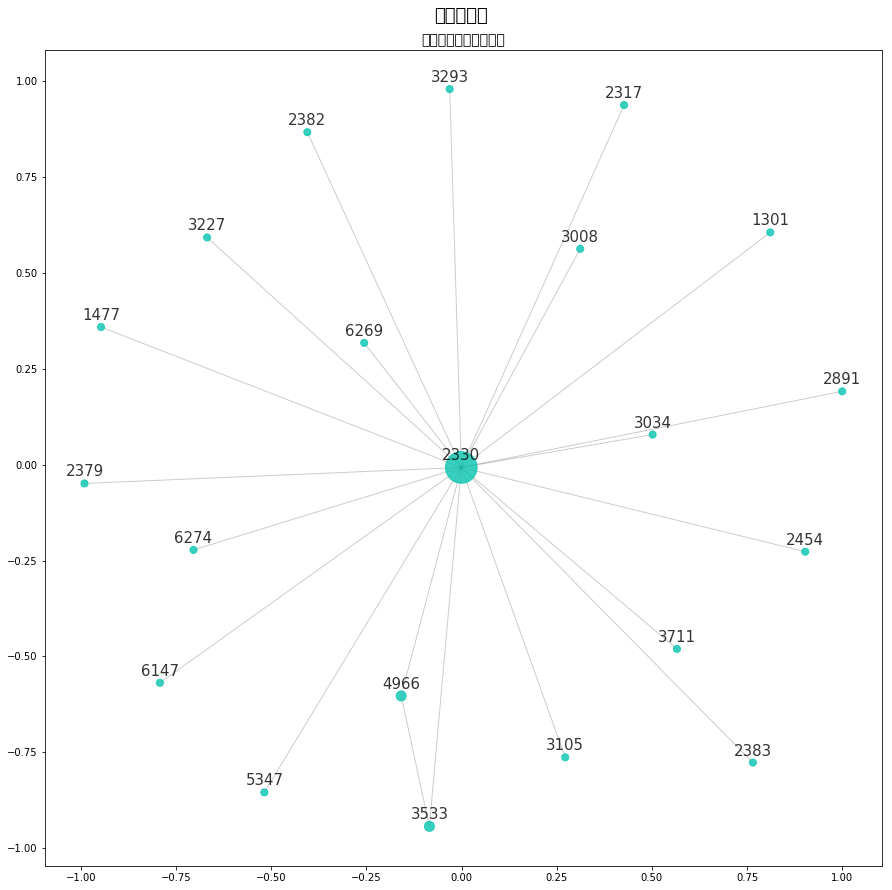

In [240]:
plt.figure(figsize=(15,15))
plt.rcParams['font.sans-serif'] = ['SimHei']   
plt.rcParams['font.family']='sans-serif'
g = nx.Graph()
g.add_weighted_edges_from(co_occur_by_records)
pos=nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, alpha=0.8,node_size=[val*50 for (node, val) in g.degree()], node_color='#08c5b1')
nx.draw_networkx_edges(g, pos, node_color='b', alpha=0.2)
for p in pos:  # raise text positions
    pos[p][1] = pos[p][1] + 0.03
nx.draw_networkx_labels(g, pos, font_size = 15, font_family='sans-serif', alpha=0.8)
#plt.savefig("用詞共線圖_以每筆通聯紀錄為一句.png", dpi=100)
plt.show()

此部份能看出，大部分顧客還是會比較在意2330的股市波動，也一併可以觀察到同時會在搜尋的股市方便推波做使用

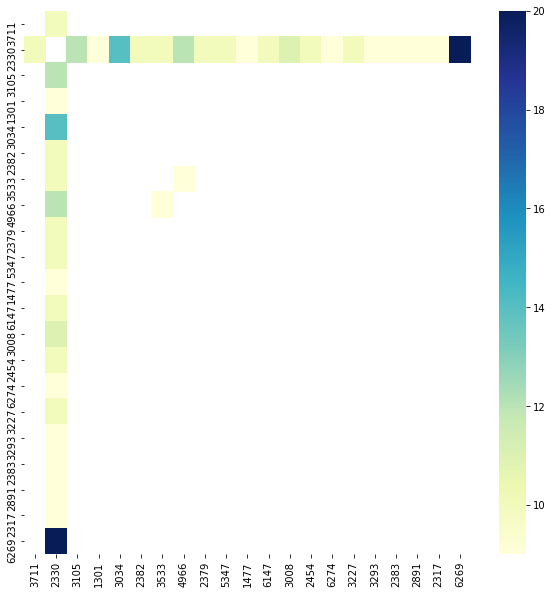

In [241]:
import seaborn as sn
plt.figure(figsize=(10,10))
sn.heatmap(co_occurrence_matrix_by_records,cmap='YlGnBu')
#plt.savefig("images/用詞熱度圖_以每筆通聯紀錄為一句.png", dpi=100)
plt.show()

# 查詢 動作

In [244]:
df3=df[1459:]
table=pd.DataFrame(df3)
csv_pd=table.to_csv('remove2.csv')

In [245]:
dfcc = pd.read_csv("remove2.csv")
dfcc

,Unnamed: 0,timestamp,event,message,type,user_id,排序
0,1459,2020-04-13 13:48:40,message,0050,info,828,4010
1,1460,2020-04-13 10:07:40,message,0050,info,826,4005
2,1461,2020-04-11 07:55:26,message,0050,info,808,3955
3,1462,2020-04-10 01:09:05,message,0050,info,759,3782
4,1463,2020-03-31 09:19:48,message,0050,info,465,2482
...,...,...,...,...,...,...,...
2201,3660,2020-03-19 02:17:55,message,TSMC,info,16,159
2202,3661,2020-03-27 09:24:41,message,VIX,info,369,2032
2203,3662,2020-03-20 12:43:34,message,YANG,info,125,873
2204,3663,2020-03-20 12:43:40,message,YINN,info,125,874


In [246]:
user_id=[]
for i in dfcc['user_id']:
    user_id.append(i)


In [249]:
import re
message = []
for i in dfcc['message']:
    message.append(re.split(',|，|；|-',i))
for i in message:
    if '' in i:
        i.remove('')

In [250]:
message

[['0050'],
 ['0050'],
 ['0050'],
 ['0050'],
 ['0050'],
 ['0050'],
 ['0050'],
 ['0050'],
 ['0050'],
 ['0050'],
 ['0050'],
 ['0050'],
 ['0050'],
 ['0050'],
 ['0050'],
 ['0050'],
 ['0055'],
 ['0056'],
 ['0056'],
 ['0056'],
 ['0056'],
 ['0056'],
 ['0056'],
 ['0056'],
 ['0056'],
 ['0056'],
 ['0056'],
 ['0056'],
 ['0056'],
 ['0056'],
 ['0056'],
 ['0056'],
 ['0056'],
 ['0056'],
 ['0056'],
 ['0056'],
 ['0056'],
 ['0056'],
 ['0056'],
 ['0056'],
 ['0056'],
 ['0056'],
 ['0056'],
 ['0056 成分股'],
 ['006208'],
 ['006208'],
 ['006208'],
 ['00632R'],
 ['00641R'],
 ['00642U'],
 ['00642U'],
 ['00642U'],
 ['00646'],
 ['00648R'],
 ['00672L'],
 ['00672L'],
 ['00677U'],
 ['00692'],
 ['00692'],
 ['00762'],
 ['00762'],
 ['00850'],
 ['00850'],
 ['00850'],
 ['00875'],
 ['009039'],
 ['014691'],
 ['019200'],
 ['021936'],
 ['023938'],
 ['035215'],
 ['042841'],
 ['044693'],
 ['047344'],
 ['048952'],
 ['050575'],
 ['051342'],
 ['052133'],
 ['052411'],
 ['054628'],
 ['055874'],
 ['056131'],
 ['062747'],
 ['071845'],
 

In [251]:
item_dict={}
for i in message:
    for x in i:
        if item_dict.get(x) == None:
            item_dict[x] = {}

In [252]:
item_dict

{'0050': {},
 '0055': {},
 '0056': {},
 '0056 成分股': {},
 '006208': {},
 '00632R': {},
 '00641R': {},
 '00642U': {},
 '00646': {},
 '00648R': {},
 '00672L': {},
 '00677U': {},
 '00692': {},
 '00762': {},
 '00850': {},
 '00875': {},
 '009039': {},
 '014691': {},
 '019200': {},
 '021936': {},
 '023938': {},
 '035215': {},
 '042841': {},
 '044693': {},
 '047344': {},
 '048952': {},
 '050575': {},
 '051342': {},
 '052133': {},
 '052411': {},
 '054628': {},
 '055874': {},
 '056131': {},
 '062747': {},
 '071845': {},
 '076513': {},
 '081225': {},
 '084833': {},
 '085547': {},
 '086891': {},
 '088709': {},
 '089201': {},
 '090360': {},
 '090388': {},
 '1': {},
 '105722': {},
 '106060': {},
 '1101': {},
 '1102': {},
 '1103': {},
 '1109': {},
 '1210': {},
 '1215': {},
 '1216': {},
 '1225': {},
 '1226': {},
 '122640': {},
 '1227': {},
 '1229': {},
 '1232': {},
 '1234': {},
 '129554': {},
 '1301': {},
 '1305': {},
 '1306': {},
 '1307': {},
 '1309': {},
 '1314': {},
 '1325': {},
 '132570': {},
 '13

In [253]:
for item2 in item_dict: #每一個字詞
    item_dict[item2]={}
    user = 0
    for item1 in message:#每一個紀錄的股票代碼
        for term in item1:
            num=0
            if term == item2:
                num+=1
            if item_dict[item2].get(user_id[user]) == None:
                item_dict[item2][user_id[user]] = num 
            else:
                item_dict[item2][user_id[user]]+=num
        user+=1

In [254]:
user={}
for i in range(len(user_id)):
    
    if user.get(user_id[i]) == None:
        user[user_id[i]]=[]
        for item in message[i]:
            user[user_id[i]].append(item)
    else:
        for item in message[i]:
            user[user_id[i]].append(item)
    
    

In [255]:
linestock=[]
for i in user:
    linestock.append(user[i])

In [256]:
TDM = pd.DataFrame.from_dict(item_dict)
TDM.head()

,0050,0055,0056,0056 成分股,006208,00632R,00641R,00642U,00646,00648R,...,STOCKS,TELEGRAM 小幫手,TEST,TSK A,TSLA,TSMC,VIX,YANG,YINN,Z Z
828,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
826,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
808,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
759,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
465,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [257]:
item_dict={}
for i in message:
    for x in i:
        if item_dict.get(x) == None:
            item_dict[x] = {}

for line in linestock:                  
    for name1 in line:                  
        for name2 in line:             
            if name1 == name2:
                continue
            if item_dict[name1].get(name2) is None:     
                item_dict[name1][name2]= 1
            else:
                item_dict[name1][name2] = item_dict[name1][name2]+ 1       




In [258]:
item_dict

{'0050': {'2330': 6,
  '428472': 1,
  '275784': 1,
  '449645': 1,
  '4919': 1,
  '5530': 1,
  '703595': 1,
  '0056': 7,
  '王品': 1,
  '金寶': 1,
  '485819': 1,
  '2337': 1,
  '2454': 1,
  '2492': 2,
  '279813': 1,
  '3884': 1,
  '投資組合': 1,
  '期貨': 1,
  '選擇權': 1,
  '聯準會': 1,
  '220900': 1,
  '大盤': 1,
  '0055': 1,
  '2890': 1,
  '台積電': 3,
  '055874': 1,
  '1338': 4,
  '1563': 2,
  '2228': 3,
  '3346': 3,
  '4551': 3,
  '4554': 3,
  '191779': 1,
  '台新金': 1,
  '玉山金': 4,
  '宏達電': 2,
  '晶焱': 2,
  '達欣工': 2,
  '鴻海': 2,
  '1817': 1,
  '704229': 1,
  '股東會': 1,
  '損益表': 1,
  '2002': 1,
  '2809': 1,
  '2812': 3,
  '台中銀': 2,
  '帆宣': 1,
  'BYND': 1},
 '0055': {'0050': 1, '0056': 1, '2330': 1, '2890': 1, '台積電': 1},
 '0056': {'0050': 7,
  '王品': 1,
  '金寶': 1,
  '220900': 1,
  '大盤': 1,
  '0055': 1,
  '2330': 18,
  '2890': 1,
  '台積電': 9,
  '2002': 4,
  '2809': 4,
  '2812': 12,
  '台中銀': 8,
  '玉山金': 8,
  '帆宣': 4,
  'BYND': 4,
  '377700': 1,
  '923473': 1,
  '4190': 1,
  '768878': 1,
  '2230': 1,
  '2317': 1,


In [273]:
co_occur_by_records=[]
for name,edges in item_dict.items():
    for v,w in edges.items():
        if w > 12:
            co_occur_by_records.append([name, v, w]) 

In [274]:
len(co_occur_by_records)

86

In [275]:
np.random.shuffle(co_occur_by_records)
temp_matrix = pd.DataFrame()
for i in co_occur_by_records:
    temp_matrix.at[i[0], i[1]] = i[2]
co_occurrence_matrix_by_records = pd.DataFrame()
for i in temp_matrix:
    for j in temp_matrix:
        co_occurrence_matrix_by_records.at[i, j] = temp_matrix.at[i, j]
co_occurrence_matrix_by_records.head()

,2881,8103,9924,2420,4736,525295,2884,2882,3515,1521,...,0056,4735,6176,4906,8131,營收,8044,445134,3008,2454
2881,NaN,NaN,28.0,35.0,NaN,NaN,NaN,42.0,NaN,35.0,...,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN
8103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9924,28.0,NaN,NaN,20.0,NaN,NaN,NaN,24.0,NaN,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2420,35.0,NaN,20.0,NaN,NaN,NaN,NaN,30.0,NaN,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4736,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,13.0,NaN,...,NaN,13.0,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN


/Users/lai/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


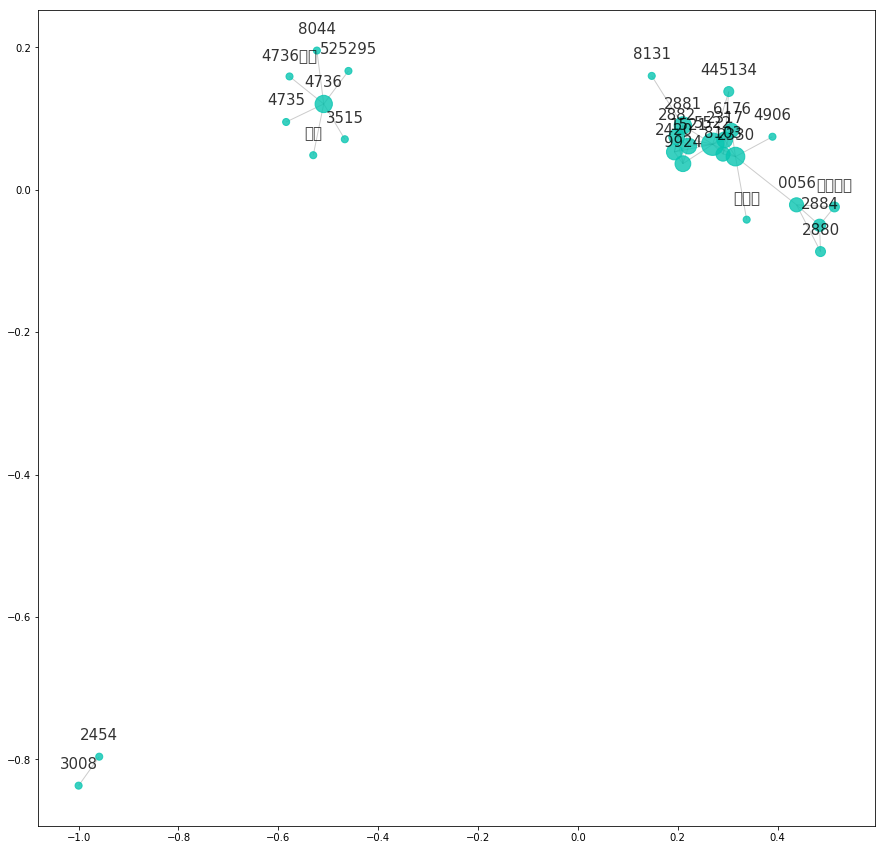

In [276]:
plt.figure(figsize=(15,15))
plt.rcParams['font.sans-serif'] = ['SimHei']   
plt.rcParams['font.family']='sans-serif'
g = nx.Graph()
g.add_weighted_edges_from(co_occur_by_records)
pos=nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, alpha=0.8,node_size=[val*50 for (node, val) in g.degree()], node_color='#08c5b1')
nx.draw_networkx_edges(g, pos, node_color='b', alpha=0.2)
for p in pos:  # raise text positions
    pos[p][1] = pos[p][1] + 0.03
nx.draw_networkx_labels(g, pos, font_size = 15, font_family='sans-serif', alpha=0.8)
#plt.savefig("用詞共線圖_以每筆通聯紀錄為一句.png", dpi=100)
plt.show()

當出現次數12次以上可以明顯看出，4736出現時4735\3515\8044 也會出現

In [277]:
co_occur_by_records=[]
for name,edges in item_dict.items():
    for v,w in edges.items():
        if w > 15:
            co_occur_by_records.append([name, v, w]) 

In [278]:
len(co_occur_by_records)

62

In [279]:
np.random.shuffle(co_occur_by_records)
temp_matrix = pd.DataFrame()
for i in co_occur_by_records:
    temp_matrix.at[i[0], i[1]] = i[2]
co_occurrence_matrix_by_records = pd.DataFrame()
for i in temp_matrix:
    for j in temp_matrix:
        co_occurrence_matrix_by_records.at[i, j] = temp_matrix.at[i, j]

/Users/lai/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


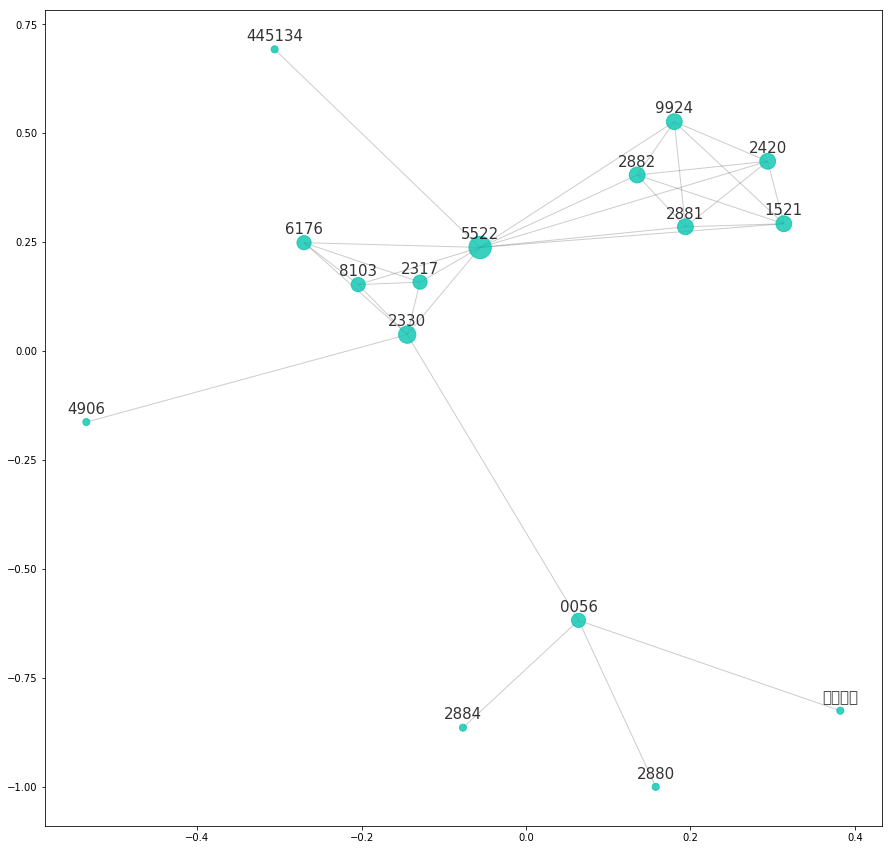

In [280]:
plt.figure(figsize=(15,15))
plt.rcParams['font.sans-serif'] = ['SimHei']   
plt.rcParams['font.family']='sans-serif'
g = nx.Graph()
g.add_weighted_edges_from(co_occur_by_records)
pos=nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, alpha=0.8,node_size=[val*50 for (node, val) in g.degree()], node_color='#08c5b1')
nx.draw_networkx_edges(g, pos, node_color='b', alpha=0.2)
for p in pos:  # raise text positions
    pos[p][1] = pos[p][1] + 0.03
nx.draw_networkx_labels(g, pos, font_size = 15, font_family='sans-serif', alpha=0.8)
#plt.savefig("用詞共線圖_以每筆通聯紀錄為一句.png", dpi=100)
plt.show()

當改成超過15次以上，更能明顯看出查詢5522跟其他股票之間的關聯

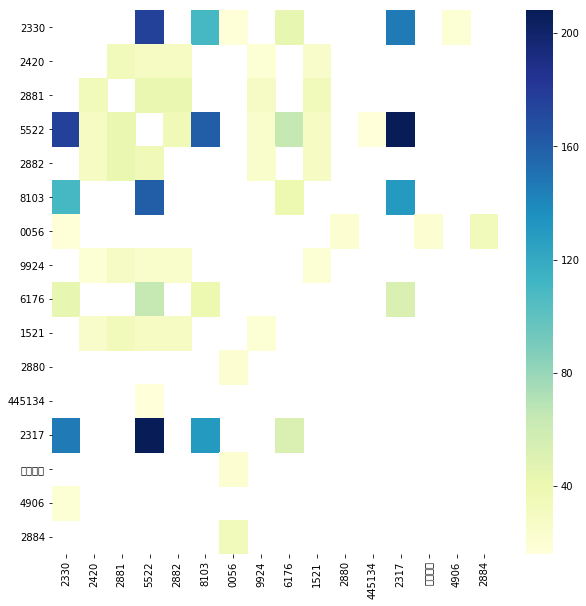

In [281]:
import seaborn as sn
plt.figure(figsize=(10,10))
sn.heatmap(co_occurrence_matrix_by_records,cmap='YlGnBu')

#plt.savefig("images/用詞熱度圖_以每筆通聯紀錄為一句.png", dpi=100)
plt.show()